In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import imageio
import os
import plotly.io as pio
from plotly.subplots import make_subplots
import numpy as np
import plotly.graph_objects as go
import geopandas as gpd

In [2]:
df = pd.read_csv('output.csv')
df

,Year,Country of Asylum,Area,Country of Origin,Refugee Status Type,Category,Recognized Cases,Rejected Cases,Pending Cases,Total Applications,...,Female 60+,F: Unknown,Male 0-4,Male 5-17,Male 18-59,Male 60+,M: Unknown,Total Females,Total Males,Total Population
0,2000,Zimbabwe,0,Afghanistan,G / FI,Refugees (incl. refugee-like situations),5,0,0,5,...,0,0,0,0,0,0,0,0,0,0
1,2000,South Africa,0,Afghanistan,G / FI,Asylum-seekers,0,0,8,8,...,0,0,0,0,0,0,0,0,0,0
2,2000,South Africa,0,Afghanistan,G / FI,Refugees (incl. refugee-like situations),0,0,8,8,...,0,0,0,0,0,0,0,0,0,0
3,2000,Uzbekistan,0,Afghanistan,U / FI,Asylum-seekers,747,112,1235,2094,...,0,0,0,0,0,0,0,0,0,0
4,2000,Uzbekistan,0,Afghanistan,U / FI,Refugees (incl. refugee-like situations),747,112,1235,2094,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6961542,2016,Zambia,Zambia : Dispersed in the country / territory,Zimbabwe,G / FI,Others of concern,0,0,0,0,...,400,0,602,2332,2786,512,0,6172,6232,12404
6961543,2016,Zambia,Zambia : Dispersed in the country / territory,Zimbabwe,G / FI,Returned IDPs,0,0,0,0,...,400,0,602,2332,2786,512,0,6172,6232,12404
6961544,2016,Zambia,Zambia : Dispersed in the country / territory,Zimbabwe,G / FI,Refugees (incl. refugee-like situations),0,0,0,0,...,400,0,602,2332,2786,512,0,6172,6232,12404
6961545,2016,Zambia,Zambia : Dispersed in the country / territory,Zimbabwe,G / FI,Returnees,0,0,0,0,...,400,0,602,2332,2786,512,0,6172,6232,12404


In [3]:
df1 = df.drop(['Refugee Status Type', 'Area' , 'Category' , 'Recognized Cases' , 'Rejected Cases' , 'Pending Cases' , 'Total Applications', 
                'Female 0-4' , 'Female 5-17' , 'Female 18-59', 'Female 60+', 'F: Unknown' , 
                'Male 0-4' , 'Male 5-17' , 'Male 18-59' , 'Male 60+' , 'M: Unknown' , 'Total Population'], axis=1)

In [4]:
df1

,Year,Country of Asylum,Country of Origin,Total Females,Total Males
0,2000,Zimbabwe,Afghanistan,0,0
1,2000,South Africa,Afghanistan,0,0
2,2000,South Africa,Afghanistan,0,0
3,2000,Uzbekistan,Afghanistan,0,0
4,2000,Uzbekistan,Afghanistan,0,0
...,...,...,...,...,...
6961542,2016,Zambia,Zimbabwe,6172,6232
6961543,2016,Zambia,Zimbabwe,6172,6232
6961544,2016,Zambia,Zimbabwe,6172,6232
6961545,2016,Zambia,Zimbabwe,6172,6232


In [5]:
years_to_filter = [2013, 2014, 2015, 2016]

In [6]:
df1_1 = df1[df1['Year'].isin(years_to_filter)]

In [7]:
df1_1

,Year,Country of Asylum,Country of Origin,Total Females,Total Males
1495476,2013,Turkey,Afghanistan,15,19
1495477,2013,Turkey,Afghanistan,15,19
1495478,2013,Turkey,Afghanistan,29,20
1495479,2013,Turkey,Afghanistan,29,20
1495480,2013,Turkey,Afghanistan,391,422
...,...,...,...,...,...
6961542,2016,Zambia,Zimbabwe,6172,6232
6961543,2016,Zambia,Zimbabwe,6172,6232
6961544,2016,Zambia,Zimbabwe,6172,6232
6961545,2016,Zambia,Zimbabwe,6172,6232


In [8]:
df1_1.drop_duplicates(inplace=True)

/var/folders/z3/h787plg151ngb1cq61f4rbf40000gn/T/ipykernel_68228/4178655005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_1.drop_duplicates(inplace=True)


In [18]:
df1_1

,Year,Country of Asylum,Country of Origin,Total Females,Total Males
1495476,2013,Turkey,Afghanistan,15,19
1495478,2013,Turkey,Afghanistan,29,20
1495480,2013,Turkey,Afghanistan,391,422
1495482,2013,Turkey,Afghanistan,392,440
1495484,2013,Turkey,Afghanistan,132,242
...,...,...,...,...,...
6961505,2016,South Africa,Zimbabwe,0,0
6961519,2016,Zambia,Zimbabwe,4554,6625
6961526,2016,Zambia,Zimbabwe,6408,6829
6961533,2016,Zambia,Zimbabwe,9692,10695


In [19]:
df1_1.to_csv('output_2.csv', index=False)

In [15]:
df_filtered = df1_1[df1_1['Year'].between(2013, 2016)]

In [17]:
fig = px.bar(df_filtered, x='Year', y=['Total Females', 'Total Males'], title='Migrants by Gender')
fig.show(renderer = 'browser')

In [12]:
df_melted = df_filtered.melt(id_vars=['Year'], value_vars=['Total Females', 'Total Males'],
                             var_name='Gender', value_name='Total')

In [13]:
df_melted['Year'] = df_melted['Year'].astype(str)

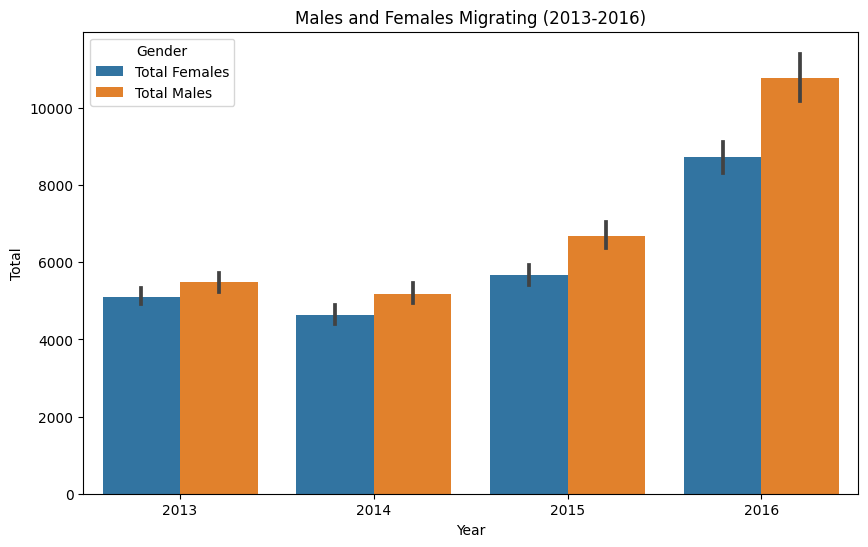

In [14]:
plt.figure(figsize=(10, 6))

sns.barplot(data=df_melted, x='Year', y='Total', hue='Gender')


plt.title('Males and Females Migrating (2013-2016)')
plt.xlabel('Year')
plt.ylabel('Total')

plt.show()